In [1]:
import pandas as pd
import numpy as np

from matplotlib.pyplot import (axes,axis,title,legend,figure,
                               xlabel,ylabel,xticks,yticks,
                               xscale,yscale,text,grid,
                               plot,scatter,errorbar,hist,polar,
                               contour,contourf,colorbar,clabel,
                               imshow)
import matplotlib.pyplot as plt
import random
import math


%matplotlib inline


In [2]:
from sklearn.datasets import fetch_olivetti_faces
data_images = fetch_olivetti_faces()
data_images

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\ACER\scikit_learn_data


{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [ ]:
# template matching

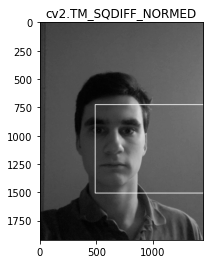

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

import os
os.chdir("C:/Users/ACER/anaconda3/data_analys/p")

images = ['p1.jpg', 'p2.jpg', 'p3.jpg', 'p4.jpg', 'p5.jpg', 'p6.jpg']

templates = ['t1.jpg', 't2.jpg', 't3.jpg']

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF',
           'cv2.TM_SQDIFF_NORMED']


def template_matching(image, template, n, m):
    w, h = template.shape[::-1]
    for meth in methods:
        method = eval(meth)
        img = image.copy()

        # Apply template Matching
        res = cv2.matchTemplate(img, template, method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

        # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)

        cv2.rectangle(img, top_left, bottom_right, 255, 5)

        plt.imshow(img, cmap='gray')
        plt.title(meth)

        figure_name = "pic" + str(n+1) + "_tem" + str(m+1) + "_meth" + str(method+1)
        plt.savefig(figure_name)


for template in templates:
    templ = cv2.imread(template, 0)
    for image in images:
        img = cv2.imread(image, 0)
        template_matching(img, templ, images.index(image), templates.index(template))

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

import os
os.chdir("C:/Users/ACER/anaconda3/data_analys/p3")
l = os.listdir()

from PIL import Image
from pathlib import Path

for path in l:
    imgfile = Path(path)
    img = Image.open(imgfile)
    width = img.size[0]
    height = img.size[1]
    img3 = img.crop( (143,35,300,250) )
    img3.save(path)

In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

import os
os.chdir("C:/Users/ACER/anaconda3/data_analys")
l = os.listdir()

from PIL import Image
from pathlib import Path

imgfile = Path('test.png')
img = Image.open(imgfile)
width = img.size[0]
height = img.size[1]
img3 = img.crop( (143,35,300,250) )
img3.save('test2.png')

In [ ]:
# viola-johns

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
os.chdir("C:/Users/ACER/anaconda3/data_analys/p")

images = ['p1.jpg', 'p2.jpg', 'p3.jpg', 'p4.jpg', 'p5.jpg', 'p6.jpg']


def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def faceDetection (image, image_gray, n):
    haar_face = cv2.CascadeClassifier('haar/face.xml')
    faces_rects = haar_face.detectMultiScale(image_gray, scaleFactor=1.2, minNeighbors=5)

    # Let us print the no. of faces found
    print('Faces found: ', len(faces_rects))

    for (x, y, w, h) in faces_rects:
         cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 5)

    #convert image to RGB and show image
    plt.imshow(convertToRGB(image))
    figure_name = "VJ-" + str(n+1) + "-face"
    plt.savefig(figure_name)


def eyeDetection (image, image_gray, n):
    haar_face = cv2.CascadeClassifier('haar/eye.xml')
    faces_rects = haar_face.detectMultiScale(image_gray, scaleFactor=1.2, minNeighbors=5)

    print('Eyes found: ', len(faces_rects))

    for (x, y, w, h) in faces_rects:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 5)

    plt.imshow(convertToRGB(image))
    figure_name = "VJ-" + str(n+1) + "-eye"
    plt.savefig(figure_name)


for img in images:
    image = cv2.imread(img)
    image2 = image.copy()
    print(image.shape)
    # Converting to grayscale
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Displaying the grayscale image
    plt.imshow(image_gray, cmap='gray')
    faceDetection(image, image_gray, images.index(img))
    #eyeDetection(image2, image_gray, images.index(img))

In [ ]:
#face symmetry

In [ ]:
import cv2
import os
import sys
import numpy as np

os.chdir("C:/Users/ACER/anaconda3/data_analys/p")

images = ['p1.jpg', 'p2.jpg', 'p3.jpg', 'p4.jpg', 'p5.jpg', 'p6.jpg']

def face_symmetry(face_cropped):
    size = face_cropped.shape
    w = int(size[1]/10)
    if w < 3:
        w = 3
    line = w
    best_central = [w, 1000000]
    while line < size[1] - w:
        tmp = 0
        for i in range(1, w+1):
        for j in range(size[0]):
            tmp += np.abs(int(face_cropped[j][line-i]) - int(face_cropped[j][line+i]))
        if tmp < best_central[1]:
        best_central = [line, tmp]
        line += 2
    w1 = int(w/2)
    if w1 < 3:
        w1 = 3
    best_left = [w1, 1000000]
    best_right = [best_central[0] + w1, 1000000]
        line1 = w1
    line2 = best_central[0] + w1
    while line1 < best_central[0] - w1 and line2 < size[1] - w1:
        tmp1 = 0
        tmp2 = 0
        for i in range(1, w1+1):
        for j in range(int(size[0]/4), int(3*size[0]/4)):
            tmp1 += np.abs(int(face_cropped[j][line1-i]) - int(face_cropped[j][line1+i]))
            tmp2 += np.abs(int(face_cropped[j][line2-i]) - int(face_cropped[j][line2+i]))
        if tmp1 < best_left[1]:
        best_left = [line1, tmp1]
        if tmp2 < best_right[1]:
        best_right = [line2, tmp2]
        line1 += 2
        line2 += 2
    return best_central[0], best_left[0], best_right[0]

for img in images:
        image = cv2.imread(img)
    image2 = image.copy()
    print("Computing for template {} ...".format(i))
    if i == 1:
    print("\tComputing symmetry lines...")
    filename = "template{}.jpg".format(i)
    template = cv2.cvtColor(cv2.imread(os.path.sep.join((dataPath, filename))), cv2.COLOR_BGR2GRAY)
    typeDir = os.path.sep.join((resultPath, "template{}".format(i)))
    method = cv2.TM_SQDIFF
    count = 1
    w, h = template.shape
    for j in data_faces[1:]:
    res = cv2.matchTemplate(j, template, method)
    _, _, top_left, _ = cv2.minMaxLoc(res)
    bottom_right = (top_left[0] + h, top_left[1] + w)
    res = j.copy()
    if i == 1:
        c, l, r = face_symmetry(j[top_left[1]:top_left[1]+w, top_left[0]:top_left[0]+h])
        res = cv2.line(res, (top_left[0]+c, top_left[1]), (top_left[0]+c, top_left[1]+w), (255,255,255), 2) 
        res = cv2.line(res, (top_left[0]+l, top_left[1] + int(h/4)), (top_left[0]+l, top_left[1] + int(3*h/4)), (255,255,255), 2) 
        res = cv2.line(res, (top_left[0]+r, top_left[1] + int(h/4)), (top_left[0]+r, top_left[1] + int(3*h/4)), (255,255,255), 2)
    res = cv2.rectangle(res, top_left, bottom_right, (255, 0, 0), 2)
    filename = "{}.jpg".format(count)
    count+=1
    p = os.path.sep.join((typeDir, filename))
    cv2.imwrite(p, cv2.cvtColor(res, cv2.COLOR_GRAY2BGR))